<a href="https://colab.research.google.com/github/JimNewaz/NLP-Series/blob/main/glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import gensim.downloader as api
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
glove_model["sarcasm"]

array([-0.39485  , -0.047207 ,  0.49522  ,  0.45164  , -0.075294 ,
       -0.026873 ,  0.16358  , -0.6752   ,  0.23672  , -0.11616  ,
        0.017    ,  0.14207  , -0.57842  , -0.12115  ,  0.668    ,
        0.54039  , -0.023251 , -0.010951 ,  0.21742  , -0.1409   ,
        0.46659  ,  0.10797  , -0.023445 , -0.22251  , -0.52934  ,
       -0.26212  ,  0.80097  ,  0.27452  , -0.25782  ,  0.21083  ,
       -0.43352  , -0.46866  , -0.22725  ,  0.57748  ,  0.42559  ,
        0.040984 , -0.95178  , -0.34284  ,  0.27032  ,  0.31932  ,
        0.22256  ,  0.10216  ,  0.4024   , -0.29178  ,  0.64267  ,
        0.15176  , -0.15207  ,  0.12838  , -0.58268  , -0.48353  ,
       -0.12372  ,  0.49967  ,  0.74322  , -0.047477 , -0.37838  ,
        0.20182  , -0.20901  , -0.09617  ,  0.57492  , -0.04032  ,
        0.34025  ,  0.018011 , -0.092072 , -0.046938 , -0.21063  ,
       -0.12938  , -0.0026253,  0.095695 ,  0.53579  , -0.0034975,
       -0.044565 , -0.1596   ,  0.77916  , -0.073665 ,  0.0290

In [ ]:
glove_model.most_similar("sarcasm")

[('irony', 0.6803990602493286),
 ('sarcastic', 0.5998893976211548),
 ('wry', 0.5982927083969116),
 ('sardonic', 0.5883033275604248),
 ('wit', 0.570685088634491),
 ('condescension', 0.5640851259231567),
 ('cynicism', 0.5626624822616577),
 ('humour', 0.5518166422843933),
 ('deadpan', 0.5473425388336182),
 ('deprecating', 0.5359240174293518)]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


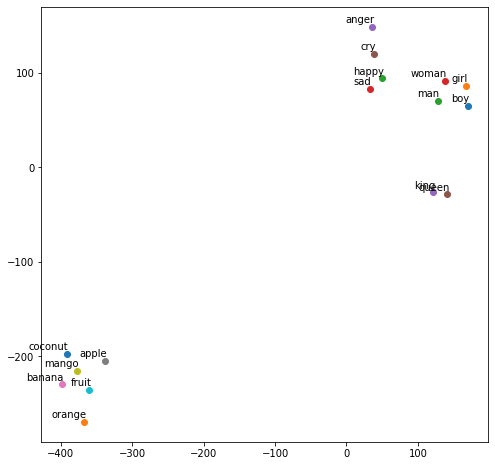

In [ ]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "banana", "apple", "mango", "fruit", "coconut", "orange", "happy" , "sad" , "anger", "cry"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(glove_model)